# Import

In [213]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


# Load Dataset

In [214]:
data = pd.read_csv('../../Data/DataLaba1/energy_task.csv').dropna()
data


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,11-01-2016 17:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,18.2000,48.900000,17.033333,45.5300,6.60,733.5,92.000000,7.000000,63.000000,5.3
1,11-01-2016 17:10,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,18.2000,48.863333,17.066667,45.5600,6.48,733.6,92.000000,6.666667,59.166667,5.2
2,11-01-2016 17:20,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,18.2000,48.730000,17.000000,45.5000,6.37,733.7,92.000000,6.333333,55.333333,5.1
3,11-01-2016 17:30,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,18.1000,48.590000,17.000000,45.4000,6.25,733.8,92.000000,6.000000,51.500000,5.0
4,11-01-2016 17:40,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,18.1000,48.590000,17.000000,45.4000,6.13,733.9,92.000000,5.666667,47.666667,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,27-05-2016 17:20,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,24.7000,50.074000,23.200000,46.7900,22.70,755.2,55.666667,3.333333,23.666667,13.3
19731,27-05-2016 17:30,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,24.7000,49.790000,23.200000,46.7900,22.60,755.2,56.000000,3.500000,24.500000,13.3
19732,27-05-2016 17:40,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,24.7000,49.660000,23.200000,46.7900,22.50,755.2,56.333333,3.666667,25.333333,13.3
19733,27-05-2016 17:50,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,24.6625,49.518750,23.200000,46.8175,22.30,755.2,56.666667,3.833333,26.166667,13.2


# Normalise data

In [215]:
mm_scaler = MinMaxScaler()
data_scaled = mm_scaler.fit_transform(data.drop(['date'], axis=1))
data_scaled = pd.DataFrame(data_scaled, columns=data.drop(['date'], axis=1).columns)
# data_scaled['date'] = data['date']
data_scaled
appliances = data_scaled['Appliances']
data_scaled_x = data_scaled.drop(['Appliances'], axis=1)


In [216]:
data_scaled_x.shape

(18538, 25)

# Power data

In [217]:
# p = PolynomialFeatures(1)
# data_scaled_powered_x = p.fit_transform(data_scaled_x)
# data_scaled_powered_x.shape
data_scaled_powered_x = data_scaled_x.to_numpy()

# VarianceThreshold feature select

In [218]:
data_scaled_powered_x.mean(axis=0).shape

(25,)

In [219]:
data_thresh_remove = []
td = []
for i in data_scaled_powered_x.std(axis=0):
    try:
        vt = VarianceThreshold(i**2)
        data_thresh_remove.append(vt.fit_transform(data_scaled_powered_x))
        td.append(i**2)
        # X_vt.shape
    except ValueError:
        print(i)


0.31497092482248296


# Predictors

In [220]:
ridge_optimal_for_line_regressions = []
data_splits = []
for d in data_thresh_remove:
    X_train, X_test, y_train, y_test = train_test_split(d, data_scaled['Appliances'], test_size=0.2)
    data_splits.append({'X_train': X_train, 'X_test': X_test, 'y_train': y_train, 'y_test': y_test})
    x = GridSearchCV(Ridge(), {'alpha': np.arange(0, 1, 0.05)}, scoring='r2').fit(X_train, y_train)
    ridge_optimal_for_line_regressions.append(x)
# ridge_optimal_for_line_regression.best_params_


In [221]:
print([r.best_params_ for r in ridge_optimal_for_line_regressions])


[{'alpha': 0.15000000000000002}, {'alpha': 0.1}, {'alpha': 0.1}, {'alpha': 0.1}, {'alpha': 0.1}, {'alpha': 0.2}, {'alpha': 0.0}, {'alpha': 0.9500000000000001}, {'alpha': 0.9500000000000001}, {'alpha': 0.4}, {'alpha': 0.05}, {'alpha': 0.30000000000000004}, {'alpha': 0.9500000000000001}, {'alpha': 0.9500000000000001}, {'alpha': 0.9500000000000001}, {'alpha': 0.7000000000000001}, {'alpha': 0.9500000000000001}, {'alpha': 0.35000000000000003}, {'alpha': 0.45}, {'alpha': 0.8}, {'alpha': 0.9500000000000001}, {'alpha': 0.4}, {'alpha': 0.9500000000000001}, {'alpha': 0.9500000000000001}]


In [222]:
len(ridge_optimal_for_line_regressions), len(data_splits), len(td)


(24, 24, 24)

# Result Analize

In [223]:
def res(y_predicted, y_test):
    print(f"MAE: {mean_absolute_error(y_predicted, y_test)}",
          f'RMSE: {mean_squared_error(y_predicted, y_test)}',
          f'MSE: {mean_squared_error(y_predicted, y_test)**0.5}',
          f'MAPE: {mean_absolute_percentage_error(y_predicted, y_test)}',
          f'R^2: {r2_score(y_predicted, y_test)}',
          sep='\n')


In [224]:
i = 0
ridge_optimal_for_line_regressions[i].predict(data_splits[i]['X_test']).shape, data_splits[i]['y_test']


((3708,),
 755      0.084906
 3194     0.066038
 5295     0.037736
 483      0.037736
 17265    0.037736
            ...   
 6832     0.075472
 13702    0.283019
 13512    0.047170
 3252     0.094340
 12797    0.075472
 Name: Appliances, Length: 3708, dtype: float64)

In [225]:
for i, m, d in zip(td, ridge_optimal_for_line_regressions, data_splits):
    print(f'{i}) ' + '<>'*20)
    res(m.predict(d['X_test']), d['y_test'])
    print('\n')
    

0.012795587450016124) <><><><><><><><><><><><><><><><><><><><>
MAE: 0.050410758471142646
RMSE: 0.0075792888764541645
MSE: 0.08705911139251402
MAPE: 0.6441008832736507
R^2: -4.7436235155006425


0.028915602850693112) <><><><><><><><><><><><><><><><><><><><>
MAE: 0.05279312990859302
RMSE: 0.008700939462679011
MSE: 0.09327882644351296
MAPE: 0.6395698211896997
R^2: -11.01392834299788


0.011987937222461519) <><><><><><><><><><><><><><><><><><><><>
MAE: 0.04994309971194539
RMSE: 0.007475364412536336
MSE: 0.08646018975538011
MAPE: 0.8188023831221573
R^2: -3.889438016576946


0.025515562919488238) <><><><><><><><><><><><><><><><><><><><>
MAE: 0.051925630416444796
RMSE: 0.008433762860637524
MSE: 0.0918355206912746
MAPE: 0.6289103319511773
R^2: -6.95500970501839


0.01312295094292413) <><><><><><><><><><><><><><><><><><><><>
MAE: 0.05171120338583375
RMSE: 0.007771039818689842
MSE: 0.08815350145450743
MAPE: 0.9404054523854096
R^2: -5.781040460810647


0.027940084374388077) <><><><><><><><><><><>

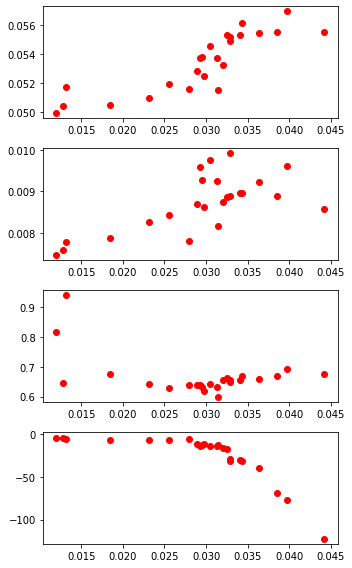

In [226]:
scores = [mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score]
fig = plt.figure(tight_layout=True)
fig.set_figheight(8)
fig.set_figwidth(5)
gs = gridspec.GridSpec(len(scores), 1)
for s in range(len(scores)):
    x = []
    y = []  
    for i, m, d in zip(td, ridge_optimal_for_line_regressions, data_splits):
        x.append(i)
        y.append(scores[s](m.predict(d['X_test']), d['y_test']))
        # print(x, y)
    ax = fig.add_subplot(gs[s, 0])
    ax.scatter(x, y, c='red')


c:\Users\Mike\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:137: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


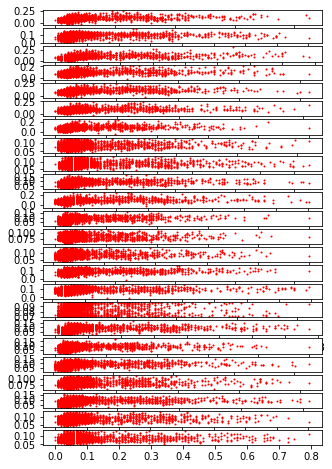

In [227]:
fig = plt.figure(tight_layout=True)
fig.set_figheight(8)
fig.set_figwidth(5)
gs = gridspec.GridSpec(len(ridge_optimal_for_line_regressions), 1)

for i, m, d in zip(range(len(ridge_optimal_for_line_regressions)), ridge_optimal_for_line_regressions, data_splits):
    ax = fig.add_subplot(gs[i, 0])
    # ax.scatter(m, d['y_test'], c='red')
    ax.plot(d['y_test'], m.predict(d['X_test']), 'ro', markersize=1)
